In [3]:
using EAMC
using SparseArrays, LinearAlgebra
using Plots

In [21]:
using SparseArrays
Q=sprand(6000,6000, .0002)

Q=Q-Diagonal(Q)
Q=Q-Diagonal(sum(Q, dims=2)|>vec)

6000×6000 SparseMatrixCSC{Float64,Int64} with 11226 stored entries:
  [1   ,    1]  =  -1.67707
  [222 ,    1]  =  0.501471
  [2011,    1]  =  0.317393
  [5367,    1]  =  0.377828
  [2   ,    2]  =  -0.0318087
  [4881,    2]  =  0.106262
  [5522,    2]  =  0.326363
  [3   ,    3]  =  -1.58081
  [1378,    3]  =  0.0784268
  [2711,    3]  =  0.911353
  [4   ,    4]  =  -0.695241
  [5   ,    5]  =  -0.506231
  ⋮
  [3021, 5995]  =  0.782902
  [4547, 5995]  =  0.0780042
  [5995, 5995]  =  -1.03459
  [5999, 5995]  =  0.244099
  [3396, 5996]  =  0.299063
  [4893, 5996]  =  0.165581
  [2431, 5997]  =  0.250932
  [5997, 5997]  =  -0.59937
  [5998, 5998]  =  -0.65421
  [384 , 5999]  =  0.940431
  [5999, 5999]  =  -0.244099
  [5644, 6000]  =  0.893008
  [6000, 6000]  =  -0.0361773

By definition the Elementary Commitors equal the entries of the Propagator.
We hence can compare the approximation via commitors to the true solution.

Below we find the relative error on a log scale

In [ ]:
T = 1
n = size(Q, 1)
nts = logspace(1, 1000, 10)
errors = map(nts) do nt
    
    g = galerkin([Q for i=1:nt], [T/nt for i=1:nt])
    approx = EAMC.commitors(g, n)[1:n,1:n] 
    truth =  exp(T*Q|>collect)
    norm(filter(!isnan,approx ./ truth .- 1))
end


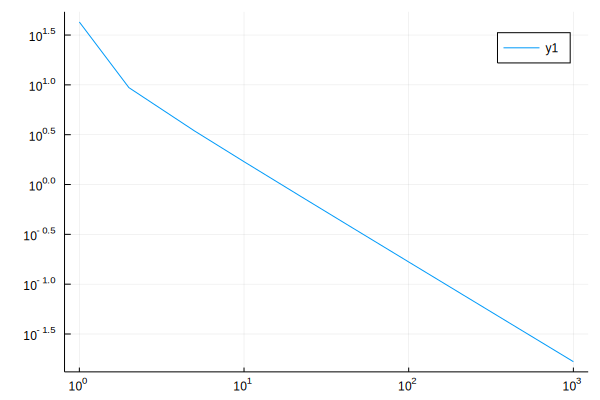

In [11]:
plot(nts,errors, axis=:log)

In [8]:
logspace(start, stop, num, base=10) = round.(Int, base .^ LinRange(log(base,start), log(base, stop), num))

logspace (generic function with 2 methods)

In [22]:
nt = 30
@time begin
    g = galerkin([Q for i=1:nt], [T/nt for i=1:nt])
    approx = EAMC.commitors(g, n)[1:n,1:n] 
end
@time exp(T*Q|>collect)

1128.951492 seconds (216.48 M allocations: 487.150 GiB, 63.41% gc time)
144.896541 seconds (47 allocations: 4.024 GiB, 32.49% gc time)


6000×6000 Array{Float64,2}:
  0.186921      0.0          0.0          …  0.0       0.0      0.0     
  0.0           0.968692     0.0             0.0       0.0      0.0     
  0.0           0.0          0.205808        0.0       0.0      0.0     
  2.5713e-38    6.274e-15    9.17246e-36     0.0       0.0      0.0     
  0.0           0.0          0.0             0.0       0.0      0.0     
  0.0           0.0          0.0          …  0.0       0.0      0.0     
  0.0           0.0          0.0             0.0       0.0      0.0     
  1.50341e-33  -4.30622e-48  5.72091e-36     0.0       0.0      0.0     
  0.0           0.0          0.0             0.0       0.0      0.0     
  0.0           0.0          0.0             0.0       0.0      0.0     
  0.0           0.0          0.0          …  0.0       0.0      0.0     
 -1.02529e-54   6.8672e-61   1.87901e-30     0.0       0.0      0.0     
  1.46229e-28   2.56498e-57  1.90365e-54     0.0       0.0      0.0     
  ⋮                    